In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl.styles.builtins import total
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from gensim.models import Word2Vec
import re
pd.set_option('display.max_columns', None)

In [3]:
def get_info(dataset: pd.DataFrame):
    new_df = pd.DataFrame()
    new_df['missing_count'] = dataset.isnull().sum()
    new_df['total'] = dataset.shape[0]
    new_df['missing%'] = (dataset.isnull().sum() / dataset.shape[0])*100
    new_df['n_unique'] = dataset.nunique()
    new_df['type'] = dataset.dtypes
    return new_df

In [4]:
df = pd.read_excel('road-accident.xlsx')
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
get_info(df)


,missing_count,total,missing%,n_unique,type
EcYear,0,46189,0.000000,5,object
EcNumber,7211,46189,15.611942,34800,object
CallTime,5956,46189,12.894845,40170,datetime64[ns]
EmergencyArea,1,46189,0.002165,37520,object
TotalPatientsInEmergency,0,46189,0.000000,13,object
Gender,1,46189,0.002165,4,object
Age,1,46189,0.002165,100,float64
HospitalName,21950,46189,47.522137,162,object
Reason,1,46189,0.002165,23940,object
responsetime,5,46189,0.010825,68,float64


In [6]:

# Fill numerical columns with the mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Fill categorical columns with the mode
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [7]:
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,BBH,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,BBH,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,BBH,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Convert CallTime to datetime, handling errors by setting invalid parsing as NaT (Not a Time)
df['CallTime'] = pd.to_datetime(df['CallTime'], errors='coerce')

# Convert CallTime to string format for imputation
df['CallTime_str'] = df['CallTime'].astype(str)

# Fill missing values in CallTime_str with the mode
calltime_imputer = SimpleImputer(strategy='most_frequent')
df['CallTime_str'] = calltime_imputer.fit_transform(df[['CallTime_str']]).ravel()

# Convert CallTime_str back to datetime format
df['CallTime'] = pd.to_datetime(df['CallTime_str'])

# Drop the temporary CallTime_str column
df.drop(columns=['CallTime_str'], inplace=True)

# Re-extract useful features from datetime
df['CallYear'] = df['CallTime'].dt.year
df['CallMonth'] = df['CallTime'].dt.month
df['CallDay'] = df['CallTime'].dt.day
df['CallHour'] = df['CallTime'].dt.hour
df['CallMinute'] = df['CallTime'].dt.minute

# Verify the results
print(df[['CallTime', 'CallYear', 'CallMonth', 'CallDay', 'CallHour', 'CallMinute']].head())
print(df.isnull().sum())

             CallTime  CallYear  CallMonth  CallDay  CallHour  CallMinute
0 2020-12-31 22:41:47    2020.0       12.0     31.0      22.0        41.0
1 2020-12-31 22:25:00    2020.0       12.0     31.0      22.0        25.0
2 2020-12-31 21:54:59    2020.0       12.0     31.0      21.0        54.0
3 2020-12-31 21:24:22    2020.0       12.0     31.0      21.0        24.0
4 2020-12-31 21:03:49    2020.0       12.0     31.0      21.0         3.0
EcYear                         0
EcNumber                       0
CallTime                    5956
EmergencyArea                  0
TotalPatientsInEmergency       0
Gender                         0
Age                            0
HospitalName                   0
Reason                         0
responsetime                   0
EducationTitle                 0
InjuryType                     0
Cause                          0
PatientStatus                  0
BicycleInvovled                0
BikesInvolved                  0
BusesInvolved               

In [9]:
# Encoding categorical variables
# Use OneHotEncoder for columns with a small number of unique values
onehot_cols = ['Gender', 'EducationTitle', 'PatientStatus']
df = pd.get_dummies(df, columns=onehot_cols)

In [10]:
label_cols = ['InjuryType']
df[label_cols] = df[label_cols].astype(str)

# Use LabelEncoder for columns with a large number of unique values
label_cols = ['InjuryType']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
df.drop(columns=['EcNumber', 'HospitalName', 'CallTime'], inplace=True)





In [12]:
df.head(30)

,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,CallYear,CallMonth,CallDay,CallHour,CallMinute,Gender_0,Gender_Female,Gender_Male,Gender_Other,EducationTitle_0,EducationTitle_Graduation,EducationTitle_Illetrate,EducationTitle_Intermediate,EducationTitle_Masters,EducationTitle_Matric,EducationTitle_Middle,EducationTitle_PHD,EducationTitle_Primary,PatientStatus_Alive & stable,PatientStatus_Alive & unstable,PatientStatus_Dead
0,2020,NEAR APS SCHOOL FORT ROAD RWP,1,27.0,Bike Slip,10.0,1,Over Speed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,22.0,41.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
1,2020,"Infront of Daig.com, Near Dha gate 2, gt road...",1,20.0,Car hit Footpath,12.0,1,Over Speed,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,22.0,25.0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
2,2020,Muhammadi chowk arshad bakery khyaban e sirsye...,1,48.0,Rickshaw hit with Car,10.0,3,Over Speed,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,54.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
3,2020,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,45.0,Car hit Car and runaway,5.0,1,Over Speed,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,24.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
4,2020,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,22.0,Unknown Bike hit Bike and runaway,5.0,3,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,3.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
5,2020,Chour chowk under bridge towards saddar peshaw...,1,50.0,Bike hit Bike and runaway,6.0,1,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,20.0,54.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
6,2020,Infront of Zam Zam CNG tipu road rwp,1,18.0,Bike Slip,5.0,0,Over Speed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,20.0,4.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
7,2020,Commite chowk pehlwan raveri murree road t.w f...,1,25.0,"Fall from bike, where patient tak lift from bi...",4.0,3,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,18.0,46.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False
8,2020,Near Saint marys school gate Mazhar Qayoom roa...,1,18.0,Bike Slip due to Oil on Road,4.0,3,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,18.0,20.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
9,2020,Infront of rasheed sweets kamran market kashmi...,1,19.0,Rickshaw hit Pedestrian and runaway,3.0,1,Carelessness,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,17.0,38.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False


In [13]:
# Fill missing values with a specific value (e.g., 0)
df['CallYear'] = df['CallYear'].fillna(0)
df['CallMonth'] = df['CallMonth'].fillna(0)
df['CallDay'] = df['CallDay'].fillna(0)
df['CallHour'] = df['CallHour'].fillna(0)
df['CallMinute'] = df['CallMinute'].fillna(0)

# Verify the result
print(df[['CallYear', 'CallMonth', 'CallDay', 'CallHour', 'CallMinute']].isna().sum())


CallYear      0
CallMonth     0
CallDay       0
CallHour      0
CallMinute    0
dtype: int64


/tmp/ipykernel_22215/2434211606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallYear', data=df, palette='viridis')


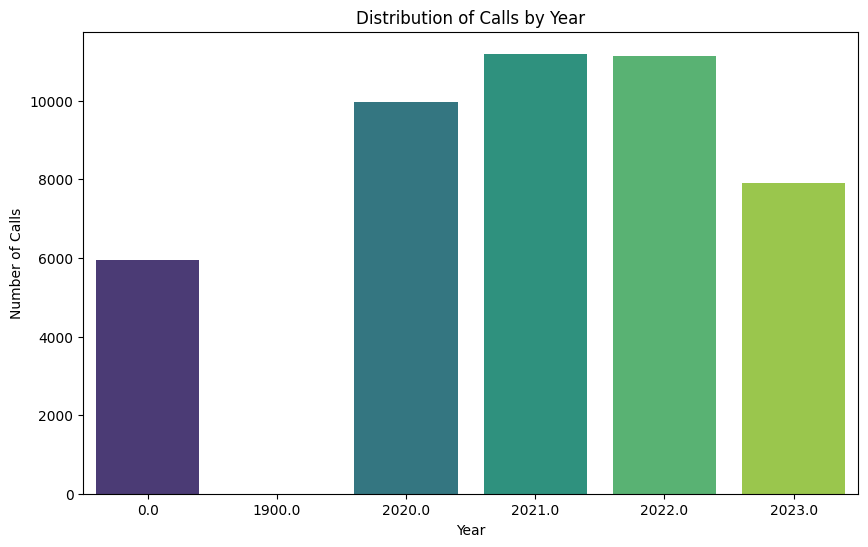

In [14]:
# Distribution of Calls by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='CallYear', data=df, palette='viridis')
plt.title('Distribution of Calls by Year')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.show()

/tmp/ipykernel_22215/2372858134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallMonth', data=df, palette='viridis')


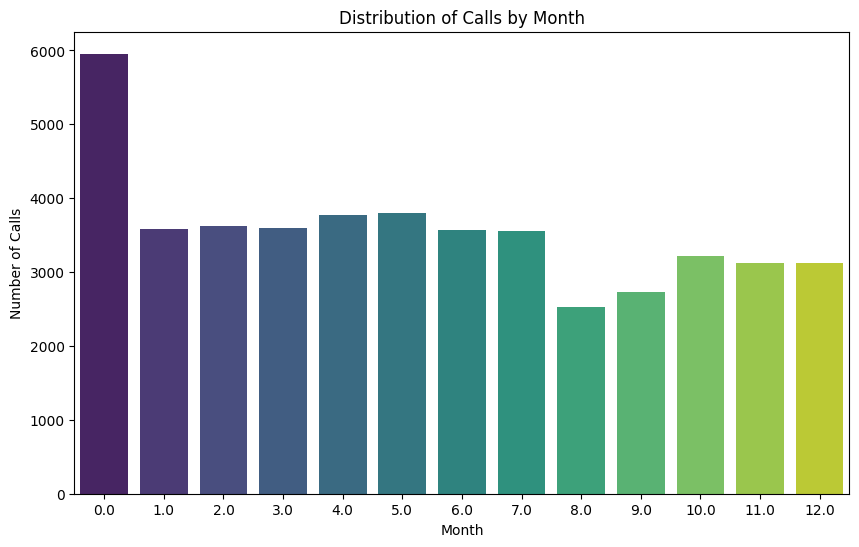

In [15]:
# Distribution of Calls by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='CallMonth', data=df, palette='viridis')
plt.title('Distribution of Calls by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

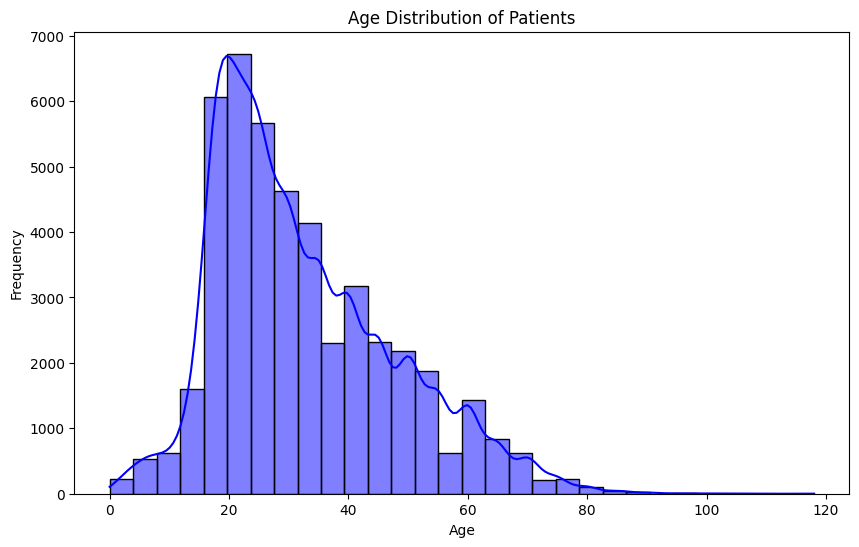

In [16]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_22215/2622802763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='InjuryType', data=df, palette='viridis', order=df['InjuryType'].value_counts().index)


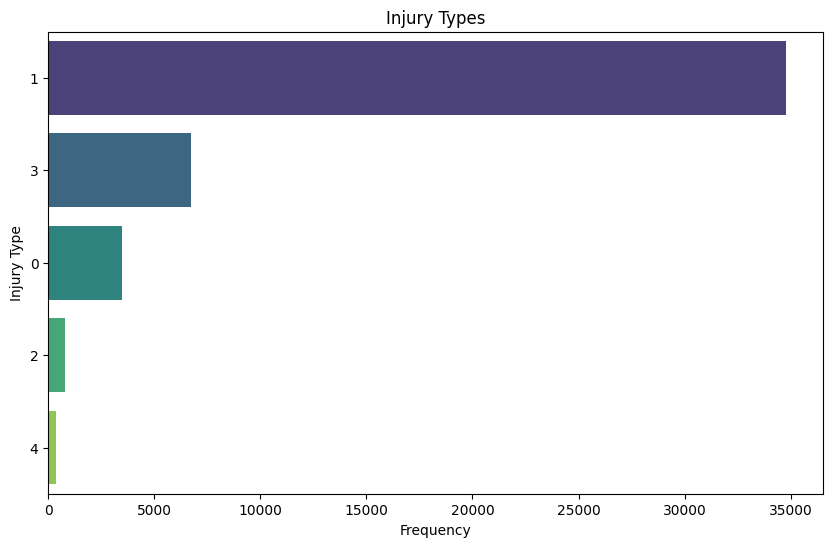

/tmp/ipykernel_22215/2622802763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cause', data=df, palette='viridis', order=df['Cause'].value_counts().index)


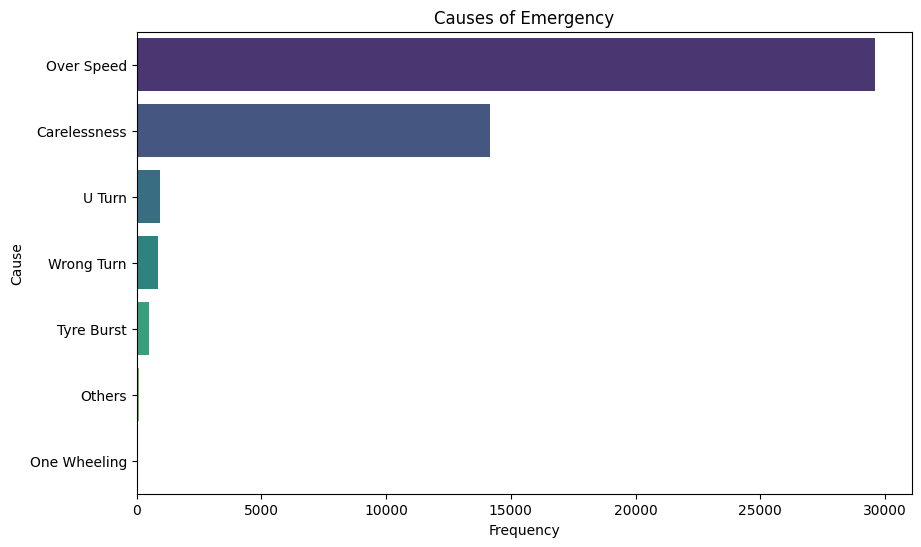

In [17]:
# Injury Types
plt.figure(figsize=(10, 6))
sns.countplot(y='InjuryType', data=df, palette='viridis', order=df['InjuryType'].value_counts().index)
plt.title('Injury Types')
plt.xlabel('Frequency')
plt.ylabel('Injury Type')
plt.show()

# Causes
plt.figure(figsize=(10, 6))
sns.countplot(y='Cause', data=df, palette='viridis', order=df['Cause'].value_counts().index)
plt.title('Causes of Emergency')
plt.xlabel('Frequency')
plt.ylabel('Cause')
plt.show()


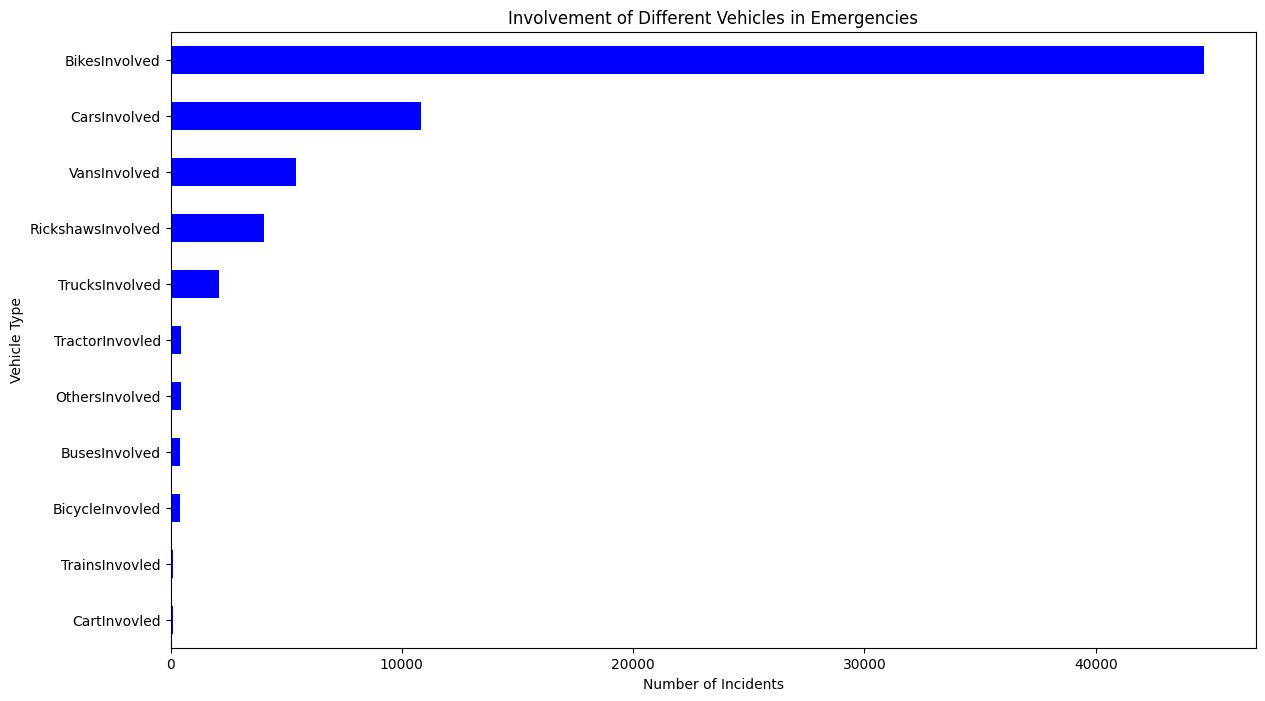

In [18]:
# Vehicles Involved
vehicles = ['BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved']

plt.figure(figsize=(14, 8))
df[vehicles].sum().sort_values().plot(kind='barh', color='blue')
plt.title('Involvement of Different Vehicles in Emergencies')
plt.xlabel('Number of Incidents')
plt.ylabel('Vehicle Type')
plt.show()


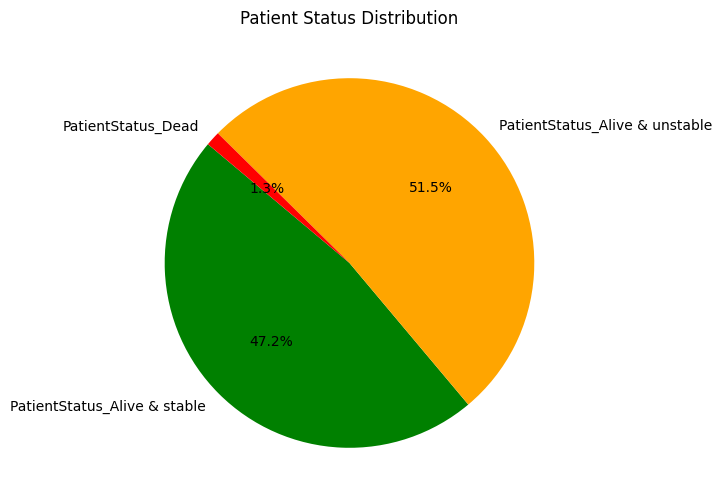

In [19]:
# Patient Status Distribution
status_cols = ['PatientStatus_Alive & stable', 'PatientStatus_Alive & unstable', 'PatientStatus_Dead']

plt.figure(figsize=(10, 6))
df[status_cols].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'])
plt.title('Patient Status Distribution')
plt.ylabel('')
plt.show()


/tmp/ipykernel_22215/215369026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallHour', data=df, palette='viridis')


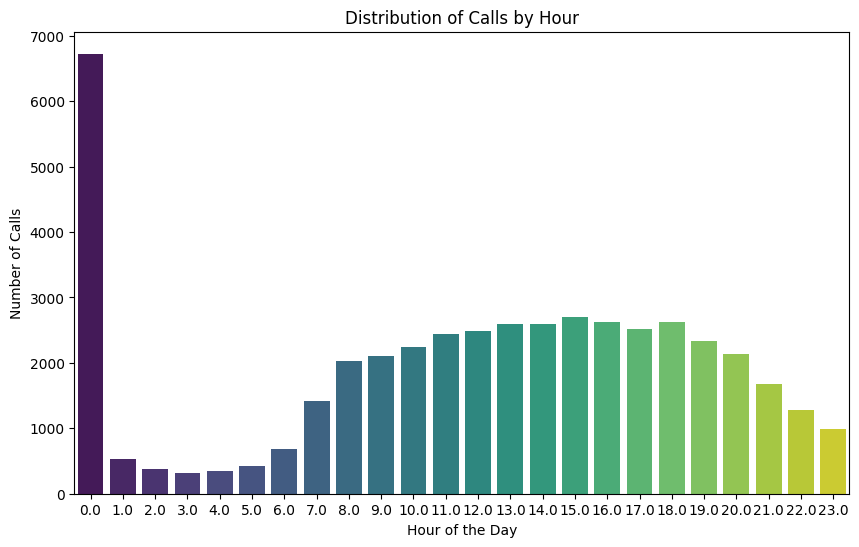

/tmp/ipykernel_22215/215369026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CallDay', data=df, palette='viridis')


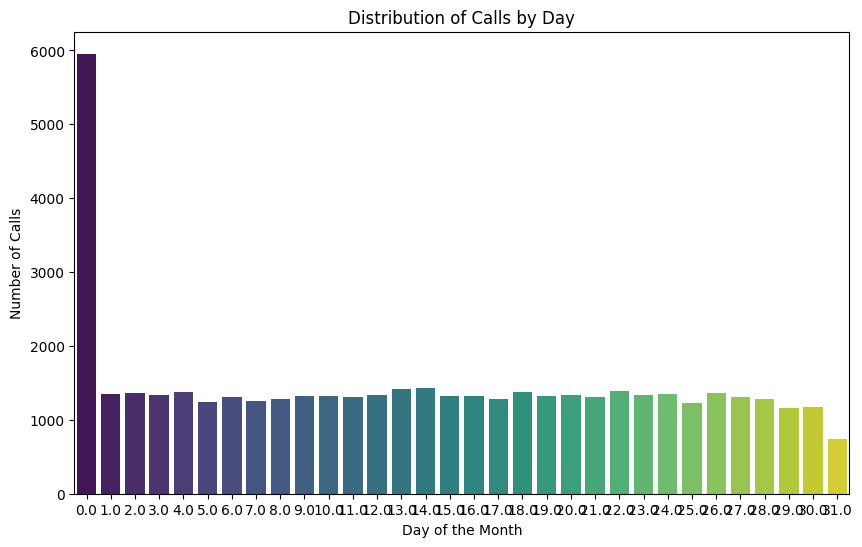

In [20]:
# Call Time by Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='CallHour', data=df, palette='viridis')
plt.title('Distribution of Calls by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()

# Call Time by Day
plt.figure(figsize=(10, 6))
sns.countplot(x='CallDay', data=df, palette='viridis')
plt.title('Distribution of Calls by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Calls')
plt.show()


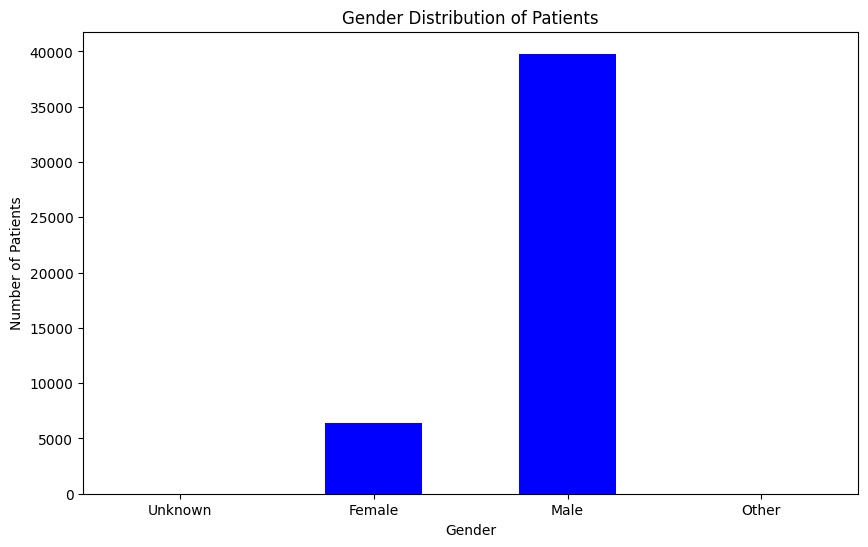

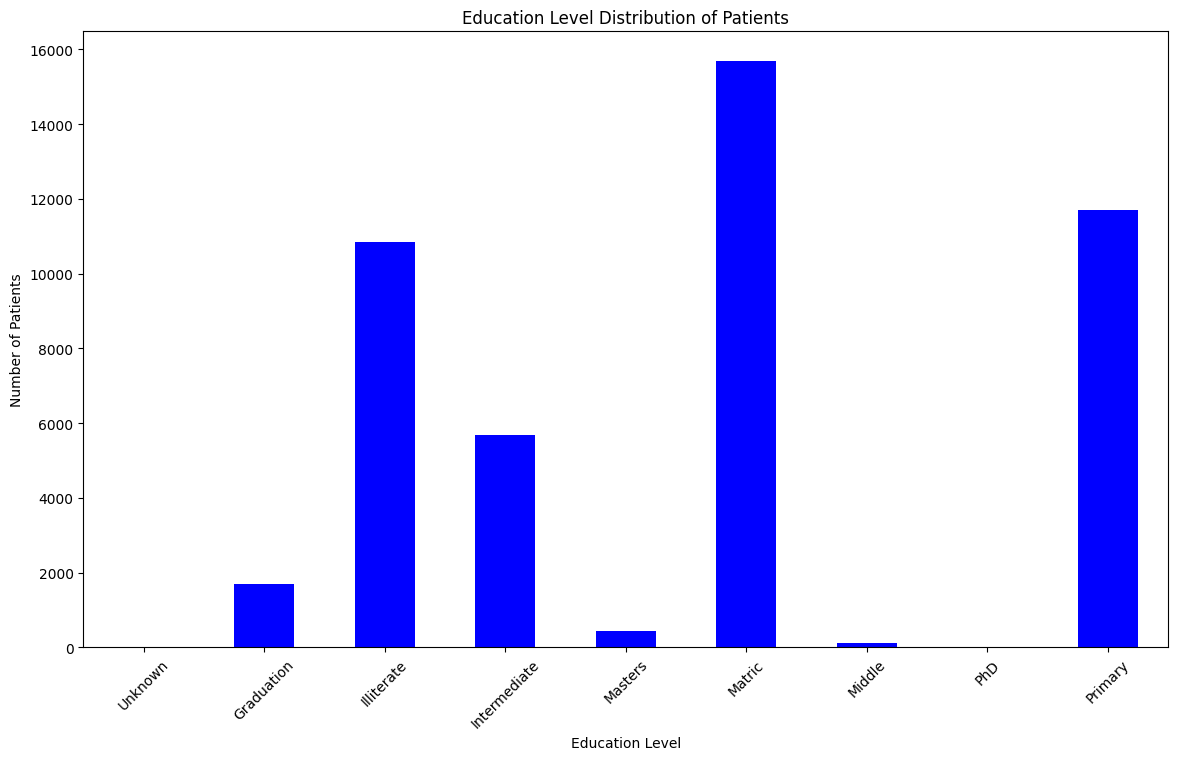

In [21]:
# Gender Distribution
gender_cols = ['Gender_0', 'Gender_Female', 'Gender_Male', 'Gender_Other']

plt.figure(figsize=(10, 6))
df[gender_cols].sum().plot(kind='bar', color='blue')
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(ticks=range(len(gender_cols)), labels=['Unknown', 'Female', 'Male', 'Other'], rotation=0)
plt.show()

# Education Distribution
education_cols = ['EducationTitle_0', 'EducationTitle_Graduation', 'EducationTitle_Illetrate', 'EducationTitle_Intermediate', 'EducationTitle_Masters', 'EducationTitle_Matric', 'EducationTitle_Middle', 'EducationTitle_PHD', 'EducationTitle_Primary']

plt.figure(figsize=(14, 8))
df[education_cols].sum().plot(kind='bar', color='blue')
plt.title('Education Level Distribution of Patients')
plt.xlabel('Education Level')
plt.ylabel('Number of Patients')
plt.xticks(ticks=range(len(education_cols)), labels=['Unknown', 'Graduation', 'Illiterate', 'Intermediate', 'Masters', 'Matric', 'Middle', 'PhD', 'Primary'], rotation=45)
plt.show()


In [32]:
df.head(5)

,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,CallYear,CallMonth,CallDay,CallHour,CallMinute,Gender_0,Gender_Female,Gender_Male,Gender_Other,EducationTitle_0,EducationTitle_Graduation,EducationTitle_Illetrate,EducationTitle_Intermediate,EducationTitle_Masters,EducationTitle_Matric,EducationTitle_Middle,EducationTitle_PHD,EducationTitle_Primary,PatientStatus_Alive & stable,PatientStatus_Alive & unstable,PatientStatus_Dead,cleaned_reason
0,2020,NEAR APS SCHOOL FORT ROAD RWP,1,27.0,Bike Slip,10.0,1,Over Speed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,22.0,41.0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,"[bike, slip]"
1,2020,"Infront of Daig.com, Near Dha gate 2, gt road...",1,20.0,Car hit Footpath,12.0,1,Over Speed,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,22.0,25.0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,"[car, hit, footpath]"
2,2020,Muhammadi chowk arshad bakery khyaban e sirsye...,1,48.0,Rickshaw hit with Car,10.0,3,Over Speed,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,54.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,"[rickshaw, hit, with, car]"
3,2020,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,45.0,Car hit Car and runaway,5.0,1,Over Speed,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,24.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,"[car, hit, car, and, runaway]"
4,2020,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,22.0,Unknown Bike hit Bike and runaway,5.0,3,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,12.0,31.0,21.0,3.0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,"[unknown, bike, hit, bike, and, runaway]"


In [39]:
# Clean and preprocess the `Reason` column
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)  # Convert non-string entries to strings
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    return text.split()  # Tokenize the text

# Replace 'Reason' with the actual name of your column if it's different
column_name = 'Reason'  # Adjust this if necessary

# Ensure the column exists before applying preprocessing
if column_name in df.columns:
    df['cleaned_reason'] = df[column_name].apply(preprocess_text)

    # Create the Word2Vec model using the cleaned reasons
    model = Word2Vec(sentences=df['cleaned_reason'], vector_size=305, window=5, min_count=1, workers=4)

    # Save the model (optional)
    model.save("word2vec.model")

    # Inspect the model's vocabulary
    vocab = list(model.wv.index_to_key)
    print(f"Vocabulary: {vocab}")

    # Access embeddings for a specific reason
    example_reason = 'bike slip'  # Replace with an actual reason
    example_tokens = preprocess_text(example_reason)
    for token in example_tokens:
        if token in model.wv:
            example_embedding = model.wv[token]
            print(f"Embedding for '{token}': {example_embedding}")
        else:
            print(f"Reason '{token}' not found in the model.")
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")

Vocabulary: ['bike', 'hit', 'and', 'the', 'to', 'car', 'due', 'runaway', 'slipped', 'over', 'speed', 'same', 'pedestrian', 'with', 'honda', 'unknown', 'slip', '70', '70cc', 'road', 'rickshaw', 'run', 'away', 'from', 'hitted', 'escaped', 'according', 'china', 'victim', 'a', 'fall', 'cd', 'in', 'cc', 'on', 'hited', 'k', 'another', 'two', 'suzuki', 'pedistarian', 'vehicle', '125', 'van', 'bikes', 'truck', 'apf', 'side', 'overspeed', 'ki', 'other', 'rikshaw', 'ko', 'for', 'sy', 'while', 'footpath', 'collieds', 'tyre', 'back', 'applied', 'turn', 'gya', 'or', 'no', 'sliped', 'ho', 'wrong', 'carry', 'se', 'patient', 'gir', 'tha', 'during', 'waja', 'crossing', 'kia', 'break', 'ny', 'of', 'number', 'cd70', 'came', 'turnover', 'hiace', 'motorbike', 'motor', 'say', 'gia', 'damage', 'saving', 'waly', 'ran', 'bhag', 'rik', 'united', 'collided', 'ril', 'kr', 'each', 'stuck', 'at', 'mehran', 'tractor', 'wala', 'pedistrian', '125cc', 'fail', 'by', 'rain', 'wheel', 'ka', 'ne', 'uturn', 'cross', 'chaina